## Assignment 1

In [1]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 1.4 MB/s eta 0:00:17
   - -------------------------------------- 0.8/24.0 MB 1.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/24.0 MB 1.4 MB/s eta 0:00:17
   -- ------------------------------------- 1.3/24.0 MB 1.4 MB/s eta 0:00:17
   -- ------------------------------------- 1.6/24.0 MB 1.3 MB/s eta 0:00:18
   --- ------------------------------------ 1.8/24.0 MB 1.2 MB/s eta 0:00:19
   --- ------------------------------------ 2.1/24.0 MB 1.2 MB/s eta 0:00:18
   --- ------------------------------------ 2.4/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ----------------------------------- 2.6/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ----------------------------------- 2.6/24.0 MB 1.2 MB/s eta 0:00:18
   ---- ------------

DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -U sentence-transformers

  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.0.1
    Uninstalling sentence-transformers-4.0.1:
      Successfully uninstalled sentence-transformers-4.0.1


DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# too big and slow
from sentence_transformers import SentenceTransformer, util

# Load the GTE-large model
model = SentenceTransformer('thenlper/gte-large')

# Example sentences
sentences = [
    "Lewis Hamilton is a Formula 1 driver.",
    "Max Verstappen races in F1.",
    "The Mona Lisa is a famous painting."
]

# Create embeddings
embeddings = model.encode(sentences)

# Compute pairwise similarities
similarity = util.cos_sim(embeddings[0], embeddings[1])
print(f"Similarity between sentence 1 and 2: {similarity.item():.4f}")


# part 1

In [6]:
import gensim.downloader as api

# List available models to pick one (optional)
print(list(api.info()['models'].keys()))

# Load a Word2Vec embedding; 'glove-wiki-gigaword-100' is reliable and lightweight
wv_pretrained = api.load("glove-wiki-gigaword-100")


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 128.1/128.1MB downloaded


In [8]:
words = ['race', 'driver', 'championship', 'pit', 'team']

for word in words:
    print(f"\nMost similar words to '{word}':")
    try:
        for sim_word, score in wv_pretrained.most_similar(word, topn=5):
            print(f"  {sim_word}: {score:.3f}")
    except KeyError:
        print(f"  '{word}' not found in the model vocabulary.")



Most similar words to 'race':
  races: 0.866
  event: 0.703
  racing: 0.683
  winning: 0.671
  contest: 0.668

Most similar words to 'driver':
  car: 0.819
  drivers: 0.809
  driving: 0.742
  truck: 0.730
  taxi: 0.716

Most similar words to 'championship':
  tournament: 0.829
  championships: 0.805
  finals: 0.801
  champions: 0.795
  cup: 0.783

Most similar words to 'pit':
  pits: 0.747
  shaft: 0.644
  dirt: 0.621
  mine: 0.591
  gravel: 0.581

Most similar words to 'team':
  teams: 0.852
  squad: 0.785
  football: 0.772
  players: 0.766
  coach: 0.765


In [12]:
#Example 1
analogy1 = wv_pretrained.most_similar(positive=['fly', 'airplane'], negative=['bird'])
print("fly - bird + airplane:", analogy1[:3])

fly - bird + airplane: [('plane', 0.7340909838676453), ('airplanes', 0.7079340219497681), ('planes', 0.6979356408119202)]


# part 2

In [13]:
# Step 0: Imports and Data Load
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())
print(df['sentiment'].value_counts())


[nltk_data] Downloading package punkt to C:\Users\khushi
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\khushi
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

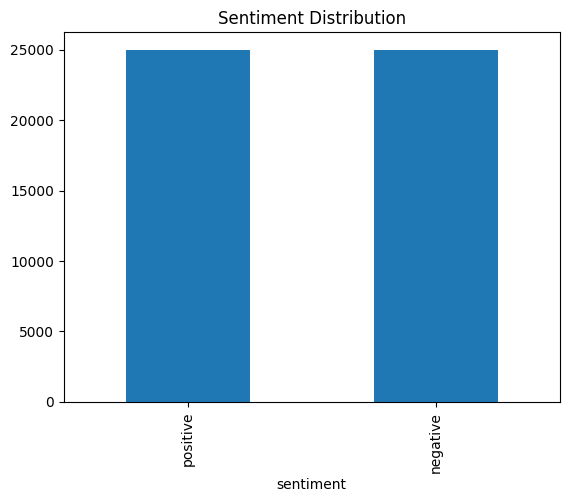

In [14]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print(df['review_length'].describe())
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and non-alpha tokens
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df['tokens'] = df['review'].apply(clean_text)
print(df['tokens'].head())


[nltk_data] Downloading package punkt to C:\Users\khushi
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\khushi
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokens, dtype: object


## fixing nltk

In [18]:
import nltk
print(nltk.__version__)


3.9.1


In [19]:
import os
os.environ.pop('NLTK_DATA', None)  # Remove it if already set
import nltk
nltk.download('punkt', download_dir='./nltk_data')
nltk.download('stopwords', download_dir='./nltk_data')
os.environ['NLTK_DATA'] = './nltk_data'


[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\khushi
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [22]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Testing if the punkt tokenizer works now!"))

['Testing', 'if', 'the', 'punkt', 'tokenizer', 'works', 'now', '!']


done

In [24]:
X = df['tokens']
y = df['sentiment'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
def get_review_vector(tokens, model, vector_size):
    vecs = [model[w] for w in tokens if w in model]
    if not vecs:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)


In [26]:
#pre trained 
wv = api.load("glove-wiki-gigaword-100")  # Or try 'word2vec-google-news-300'

X_train_wv = np.vstack([get_review_vector(x, wv, 100) for x in X_train])
X_test_wv  = np.vstack([get_review_vector(x, wv, 100) for x in X_test])


In [27]:
#Custom Skip-gram Word2Vec
skipgram_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, sg=1, epochs=5)
X_train_sg = np.vstack([get_review_vector(x, skipgram_model.wv, 100) for x in X_train])
X_test_sg  = np.vstack([get_review_vector(x, skipgram_model.wv, 100) for x in X_test])

In [28]:
#Custom CBOW Word2Vec
cbow_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, sg=0, epochs=5)
X_train_cbow = np.vstack([get_review_vector(x, cbow_model.wv, 100) for x in X_train])
X_test_cbow  = np.vstack([get_review_vector(x, cbow_model.wv, 100) for x in X_test])

In [29]:
#Custom FastText
ft_model = FastText(sentences=X_train, vector_size=100, window=5, min_count=2, epochs=5)
X_train_ft = np.vstack([get_review_vector(x, ft_model.wv, 100) for x in X_train])
X_test_ft  = np.vstack([get_review_vector(x, ft_model.wv, 100) for x in X_test])

In [30]:
#training and eval
def eval_model(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")
    return acc, pr, rc, f1

results = {}
results['Pre-trained W2V'] = eval_model(X_train_wv, X_test_wv, y_train, y_test)
results['Skip-gram']        = eval_model(X_train_sg, X_test_sg, y_train, y_test)
results['CBOW']             = eval_model(X_train_cbow, X_test_cbow, y_train, y_test)
results['FastText']         = eval_model(X_train_ft, X_test_ft, y_train, y_test)


In [31]:
#results
results_table = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1"]).T
print(results_table)


                 Accuracy  Precision    Recall        F1
Pre-trained W2V    0.7992   0.801832  0.798968  0.800398
Skip-gram          0.8700   0.865065  0.879143  0.872047
CBOW               0.8550   0.848650  0.866839  0.857648
FastText           0.8400   0.837753  0.846398  0.842053
